In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Make sure the csv is in the same directory
df = pd.read_csv('heart_2020_cleaned.csv')

In [3]:
print(df.head())

  HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1       

In [4]:
print(list(df))

['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer']


In [5]:
# List of all categorical columns
cat_columns = [cat for cat in list(df) if cat not in ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']]

# Only columns that have yes/no values
yes_no_columns = ['HeartDisease','Smoking','AlcoholDrinking','Stroke','DiffWalking','Diabetic','PhysicalActivity','Asthma','KidneyDisease','SkinCancer']

# Categorical columns without yes/no values
pure_cat_columns = [cat for cat in cat_columns if cat not in yes_no_columns]

In [6]:
# Mapping for yes/no values
yes_no_map = {'Yes': 1, 'No': 0}

# Converting pure categorical columns
for cat in pure_cat_columns:
    df[f'{cat}'] = pd.Categorical(df[f'{cat}'])
    df[f'{cat}_val'] = df[f'{cat}'].cat.codes

# Converting that have yes/no values
for cat in yes_no_columns:
    df[f'{cat}_val'] = df[f'{cat}'].map(yes_no_map)

In [7]:
df.corr()

,BMI,PhysicalHealth,MentalHealth,SleepTime,Sex_val,AgeCategory_val,Race_val,GenHealth_val,HeartDisease_val,Smoking_val,AlcoholDrinking_val,Stroke_val,DiffWalking_val,Diabetic_val,PhysicalActivity_val,Asthma_val,KidneyDisease_val,SkinCancer_val
BMI,1.000000,0.109788,0.064131,-0.051822,0.026940,-0.004744,-0.037424,0.035932,0.051803,0.023118,-0.038816,0.019733,0.181678,0.211044,-0.150616,0.092345,0.050768,-0.033644
PhysicalHealth,0.109788,1.000000,0.287987,-0.061387,-0.040904,0.110763,-0.000847,-0.035703,0.170721,0.115352,-0.017254,0.137014,0.428373,0.162683,-0.232283,0.117907,0.142197,0.041700
MentalHealth,0.064131,0.287987,1.000000,-0.119717,-0.100058,-0.155506,-0.014491,-0.004412,0.028591,0.085157,0.051282,0.046467,0.152235,0.027337,-0.095808,0.114008,0.037281,-0.033412
SleepTime,-0.051822,-0.061387,-0.119717,1.000000,-0.015704,0.104953,0.035889,-0.004163,0.008327,-0.030336,-0.005065,0.011900,-0.022216,0.005962,0.003849,-0.048245,0.006238,0.041266
Sex_val,0.026940,-0.040904,-0.100058,-0.015704,1.000000,-0.067478,0.018855,-0.010283,0.070040,0.085052,0.004200,-0.003091,-0.068860,0.017768,0.048247,-0.069191,-0.009084,0.013434
AgeCategory_val,-0.004744,0.110763,-0.155506,0.104953,-0.067478,1.000000,0.163090,0.044427,0.233432,0.128331,-0.059528,0.137822,0.243263,0.216002,-0.121687,-0.058108,0.123190,0.263537
Race_val,-0.037424,-0.000847,-0.014491,0.035889,0.018855,0.163090,1.000000,0.050344,0.034854,0.065499,0.036702,-0.003956,-0.015831,-0.047322,0.056767,-0.017975,0.003709,0.134780
GenHealth_val,0.035932,-0.035703,-0.004412,-0.004163,-0.010283,0.044427,0.050344,1.000000,-0.011062,0.020625,0.001629,-0.009335,-0.043552,-0.012922,0.024418,0.007280,-0.010580,0.018982
HeartDisease_val,0.051803,0.170721,0.028591,0.008327,0.070040,0.233432,0.034854,-0.011062,1.000000,0.107764,-0.032080,0.196835,0.201258,0.186963,-0.100030,0.041444,0.145197,0.093317
Smoking_val,0.023118,0.115352,0.085157,-0.030336,0.085052,0.128331,0.065499,0.020625,0.107764,1.000000,0.111768,0.061226,0.120074,0.059663,-0.097174,0.024149,0.034920,0.033977


<AxesSubplot:>

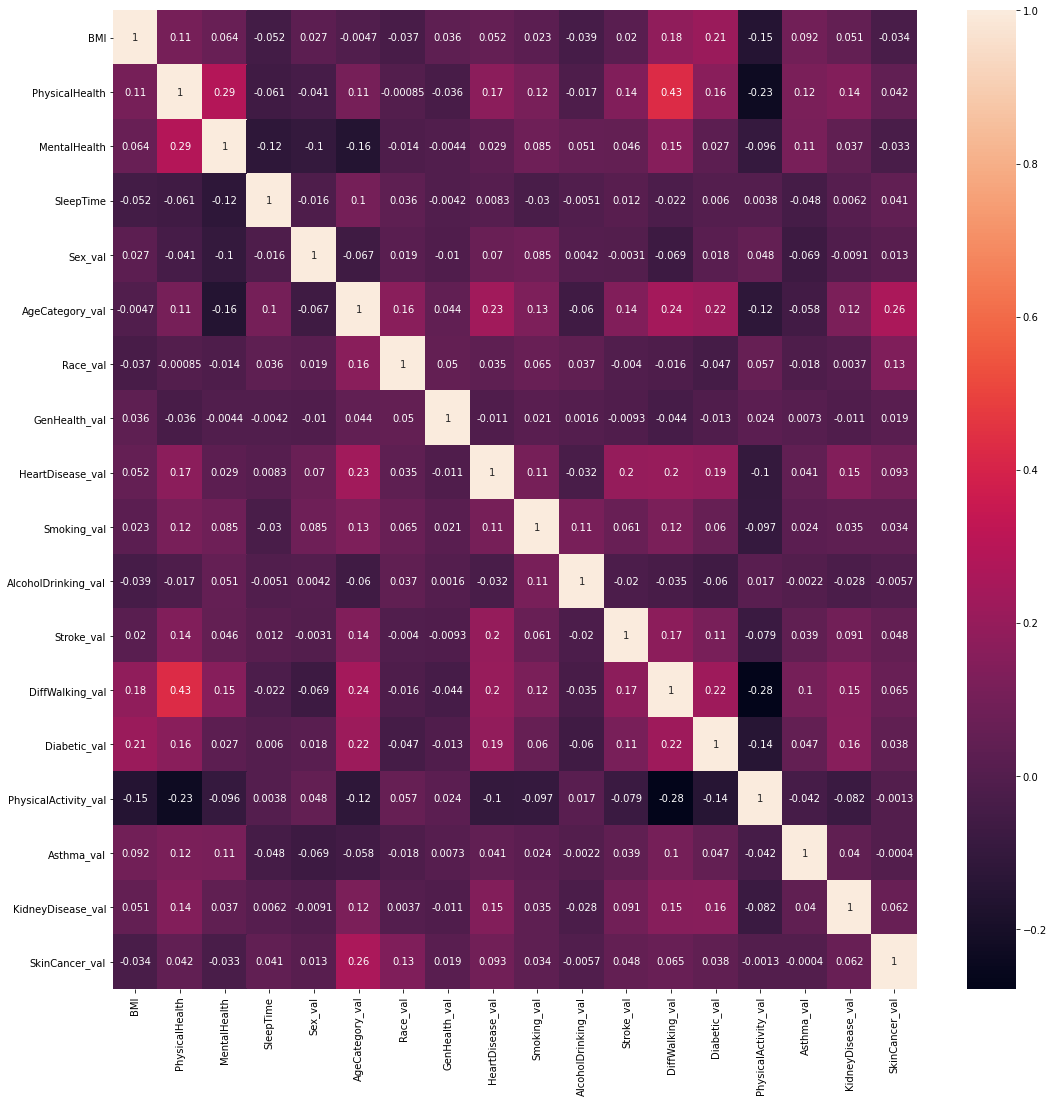

In [8]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), annot=True)

Text(0.5, 50.09375, 'Spearman')

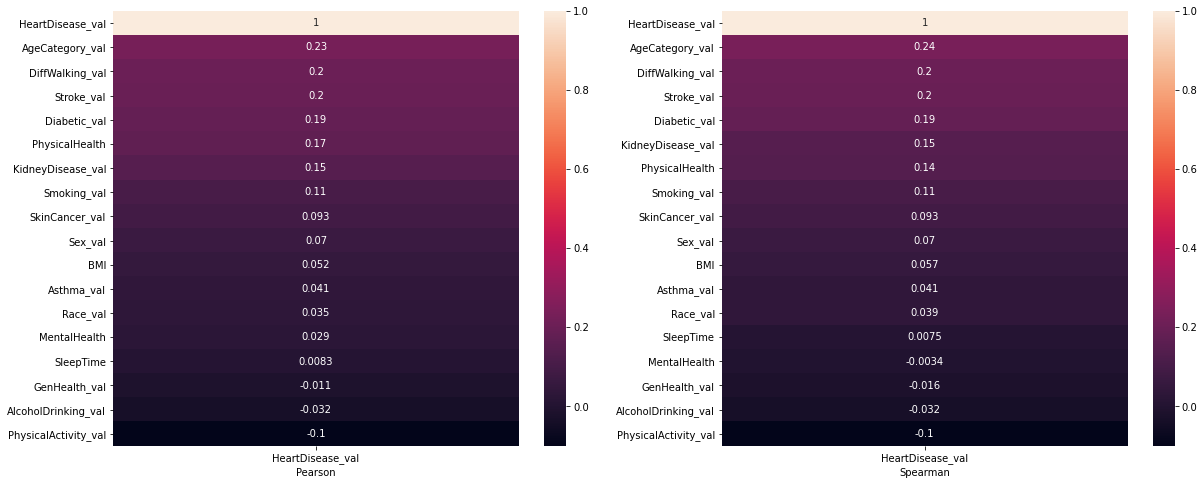

In [21]:
fig, ax = plt.subplots(1,2, figsize=(20, 8))
target = 'HeartDisease_val'

heart_disease_pearson = df.corr('pearson')[[target]].sort_values(by=target, ascending=False)
heart_disease_spearman = df.corr('spearman')[[target]].sort_values(by=target, ascending=False)

sns.heatmap(heart_disease_pearson, ax=ax[0], annot=True)
sns.heatmap(heart_disease_spearman, ax=ax[1], annot=True)

ax[0].set_xlabel("Pearson")
ax[1].set_xlabel("Spearman")